# Milestones 2

## Perkenalan 

`Name : Aan Nurliyanah`

`Batch : 002`

Link Hugging Face :


https://huggingface.co/spaces/nurliyanahaan/Milestone2_Aan_Nurliyanah


## Assignment Objective

Milestones 2 ini dibuat guna mengevaluasi Pembelajaran Phase 1:

1. Mampu memahami konsep supervised learning dan unsupervised learning
2. Mampu mempersiapkan data untuk digunakan dalam model supervised learning dan unsupervised learning
3. Mampu mengimplementasikan supervised learning dan unsupervised learning dengan dataset yang baru
4. Mampu melakukan evaluasi model
5. Mampu melakukan model tuning
6. Mampu melakukan model deployment

## Problems

Memilih algoritma Classification terbaik untuk memprediksi apakah keadaan air dapat diminum atau tidak. 

## Import Library

Penggunaan library : 
- numpy, pandas, seaborn, matplotlib : untuk perhitungan data, pengolahan data, dan visualisasi data. 
- train_test_split : untuk memisahkan antara data train dan test 
- winsorizer : untuk handling outlier 
- SimpleImputer : untuk handling missing value dengan imputasi 
- LogisticRegression,RandomForestClassifier,DecisionTreeClassifier,AdaboostClassifier: model yang digunakan.
- StandardScaler : untuk scaling numerical data
- accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix : untuk mengevalusi hasil model yang digunakan 
- cross_val_score : digunakan untuk mencari cross validation 
- GridSearchCV : untuk hyperparameter tuning
- variance_inflation_factor : untuk mlihat multicolenarity antar kolom
- SMOTE : untuk handling imbalance
- Pipeline , imbpipe : untuk menggunakan papeline 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


!pip install feature_engine
!pip install sklearn
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbpipe
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pickle
from sklearn import set_config
from imblearn.over_sampling import SMOTE


## Data Loading and Overview 

Dataset ini diambil dari sumber Kaggle :

https://www.kaggle.com/datasets/adityakadiwal/water-potability?resource=download


About this file
- ppm: parts per million
- μg/L: microgram per litre
- mg/L: milligram per litre

Column description:

1. ph: pH of 1. water (0 to 14).
2. Hardness: Capacity of water to precipitate soap in mg/L.
3. Solids: Total dissolved solids in ppm.
4. Chloramines: Amount of Chloramines in ppm.
5. Sulfate: Amount of Sulfates dissolved in mg/L.
6. Conductivity: Electrical conductivity of water in μS/cm.
7. Organic_carbon: Amount of organic carbon in ppm.
8. Trihalomethanes: Amount of Trihalomethanes in μg/L.
9. Turbidity: Measure of light emiting property of water in NTU.
10. Potability: Indicates if water is safe for human consumption. Potable -1 and Not potable -0

Loading data dengan menggunakan pd.read_csv dan mendefinisikan jika terdapat values seperti '?',' ','99999','N/A' akan didefinisikan sebagai nan atau missing value, juga menggunakan parameter skipinitialspace untuk skip jika ada spasi di seluruh dataframe.

In [2]:
data = pd.read_csv('water_potability.csv',na_values=['?',' ','99999','N/A'],skipinitialspace=True)

Melihat ukuran data, banyak kolom dan baris

In [3]:
data.shape

(3276, 10)

Menampilkan dataset default 5 teratas dengan fungsi head

In [4]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Menampilkan data default 5 terbawah dengan menggunakan fungsi tail 

In [5]:
data.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


Melihat overview dari banyaknya baris dan kolom, dan jumlah baris di setiap kolom, nama kolom beserta tipe data nya. 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


Dari overview diatas didapatkan bahwa type data nya integer dan float. ada sejumlah missing value, jumlah baris 3276 terisi, dan 10 kolom. berikutnya akan kita double cek lagi.

Mengecek missing value

In [7]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Presentase missing value

In [8]:
data.isnull().mean()*100

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

Mengecek duplikat data

In [9]:
data[data.duplicated()].shape

(0, 10)

Membagi data kedalam numeric dan categoric

In [10]:
num = data.drop('Potability',axis=1).columns.tolist()
cat = data[['Potability']].columns.tolist()

melihat central tendency dari numerical data 

In [11]:
data[num].describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000


Melihat value counts dari categoric kolom 

In [12]:
data[cat].value_counts()

Potability
0             1998
1             1278
dtype: int64

General overview :
- Terdapat missing value pada kolom ph: 14.98%, sulfate : 23.84% dan Trihalomethanes : 4.94%, akan di handle menggunakan imputasi. 
- Tidak terdapat duplikat data
- Data terbagi menjadi numeric dan categoric 

## Data Cleaning 

Membuat variabel baru dengan nama data_clean agar data asli tetap utuh.

In [13]:
data_clean = data.copy()

Untuk missing value akan dihandling di section selanjutnya dengan menggunakan SimpleImputer

## Exploratory Data Analysis (EDA)

Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

### EDA for Analysis

In [14]:
data_clean.head(3)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0


Melakukan visualisasi pada kolom target Potability 

In [15]:
data_clean.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

<AxesSubplot:>

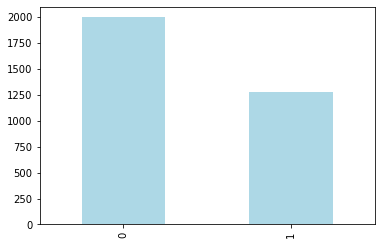

In [16]:
data_clean['Potability'].value_counts().plot(kind='bar',color='lightblue')

In [17]:
1998/3276*100

60.98901098901099

In [18]:
1278/3276*100

39.010989010989015

Dari visualisasi diatas didapatkan bahwa jumlah data yang terprediksi sebagai air yang dapat diminum lebih sedikit yaitu sebesar 39.01 %, dibandingkan dengan air yang tidak dapat diminum sebesar 60,98 %. Dari presentase didapatkan data Mild imbalance.

Melihat visualisasi ph terhadap Potability

<AxesSubplot:xlabel='Potability'>

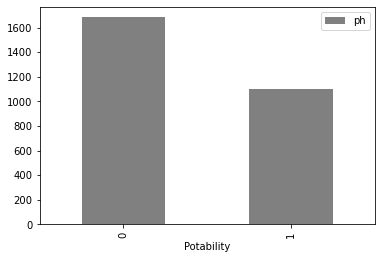

In [19]:
data_clean.groupby('Potability')[['ph']].count().plot(kind='bar',color ='grey')

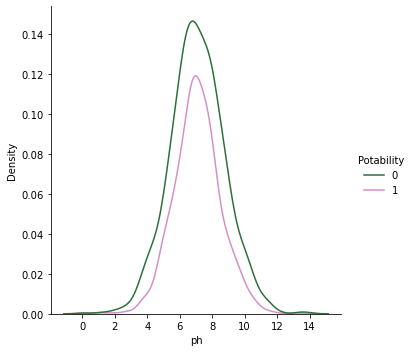

In [20]:
sns.displot(data=data_clean, x='ph', hue='Potability', kind='kde',palette='cubehelix' )

Dari kedua visualisasi diatas didapatkan bahwa data ph yang dapat diminum lebih sedikit dari pada ph yang tidak dapat diminum, jika dilihat dr grafiknya ph yang tepat yang bisa diterima untuk dikatakan dapat diminum adalah sekitar 6.52 atau 6.83 sesuai WHO standard. 

Melihat visualisasi Turbidity terhadap ph 

<AxesSubplot:xlabel='Potability'>

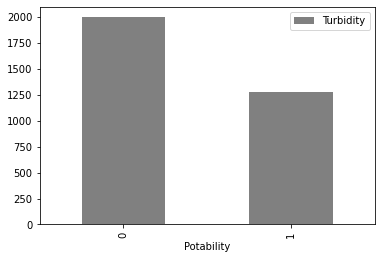

In [21]:
data_clean.groupby('Potability')[['Turbidity']].count().plot(kind='bar',color ='grey')

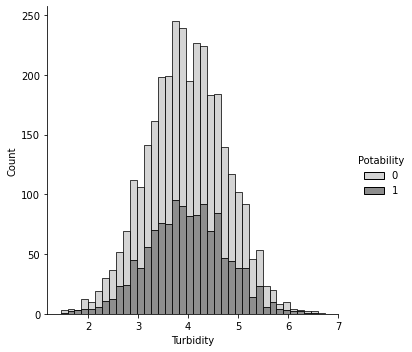

In [22]:
sns.displot(data=data_clean, x="Turbidity", hue="Potability", multiple="stack",palette='Greys' )

Puncak dari nilai turbidity ada di angka 4 , dimana nilai nya dapat diterima sebegai air yang dapat diminum. Rekomendasi WHO untuk nilai turbidity ini adalah 5. 

Melihat visualisasi Solids terhadap Potability

In [23]:
data_clean.Solids.mean()

22014.09252607711

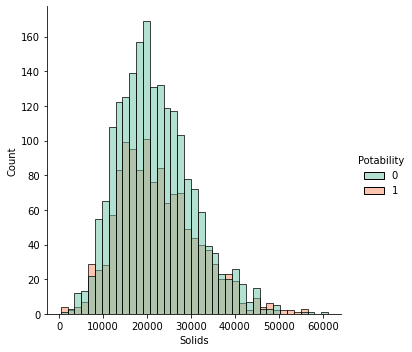

In [24]:
sns.displot(data=data_clean, x='Solids', hue='Potability',palette='Set2')

Batas yang diinginkan untuk TDS adalah 500 mg/l dan batas maksimum adalah 1000 mg/l yang ditentukan untuk tujuan minum, namun kita lihat di visualisasi diatas puncak data berada di 1000 lebih mengarah ke 2000. Rata-rata nilai solids / TDS pada data ini sebesar 22014. Jika nilai diatas itu maka tidak layak untuk diminum. 

Melihat visualisasi Sulfate

<AxesSubplot:xlabel='Sulfate', ylabel='Count'>

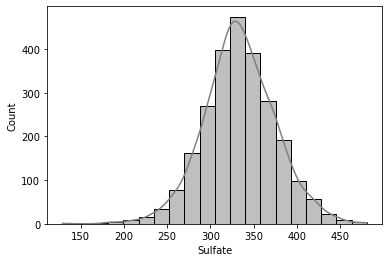

In [25]:
sns.histplot(data_clean['Sulfate'],kde=True,color='grey',bins=20)

Nilai Sulfate terbanyak ada di angka 340, dan data nilainya umumnya berkisar dari 300 - 400.  

### Split Dataset 

Memisahkan data untuk model inference sebanyak 15 data dengan random_state sebesar 15.

In [26]:
#data untuk model inference
data_inf = data_clean.sample(15,random_state=15)
data_inf

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3126,6.665774,155.709679,30610.047900,8.172548,337.173767,425.691956,15.101533,79.780467,4.903553,1
1730,6.185951,174.796123,22198.929420,7.608496,NaN,479.091845,13.744284,51.497112,5.205724,0
50,NaN,168.388431,27492.307307,7.046225,299.820478,383.795020,16.182066,75.729434,3.048057,0
426,6.887864,173.325022,19947.924178,7.488703,334.098023,441.002612,10.780501,89.005492,5.454488,0
1799,NaN,162.935371,24916.625585,6.374496,388.312725,494.288784,14.297696,84.802970,4.301273,0
777,8.589202,233.727975,7263.056749,6.953308,268.971355,258.880209,8.986363,41.930439,4.041446,1
2939,6.088022,162.278357,23567.132875,7.698582,372.835081,387.970635,13.663607,75.266064,4.173083,0
1230,7.943882,211.816551,32071.179369,7.769215,290.337398,353.336484,17.871950,78.492783,4.111691,0
312,NaN,161.826476,29299.123353,7.028797,350.430940,375.780716,19.762576,86.698457,3.497577,1
152,6.579969,197.226981,17657.084176,4.506293,290.289894,254.393276,9.847655,73.749716,4.575932,0


In [27]:
# Menghapus Inference-Set dari Dataset

data_train_test = data_clean.drop(data_inf.index)
data_train_test.head(2)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.71608,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0


In [28]:
# Reset Index 

data_train_test.reset_index(drop=True, inplace=True) 
data_inf.reset_index(drop=True, inplace=True)
data_inf

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,6.665774,155.709679,30610.047900,8.172548,337.173767,425.691956,15.101533,79.780467,4.903553,1
1,6.185951,174.796123,22198.929420,7.608496,NaN,479.091845,13.744284,51.497112,5.205724,0
2,NaN,168.388431,27492.307307,7.046225,299.820478,383.795020,16.182066,75.729434,3.048057,0
3,6.887864,173.325022,19947.924178,7.488703,334.098023,441.002612,10.780501,89.005492,5.454488,0
4,NaN,162.935371,24916.625585,6.374496,388.312725,494.288784,14.297696,84.802970,4.301273,0
5,8.589202,233.727975,7263.056749,6.953308,268.971355,258.880209,8.986363,41.930439,4.041446,1
6,6.088022,162.278357,23567.132875,7.698582,372.835081,387.970635,13.663607,75.266064,4.173083,0
7,7.943882,211.816551,32071.179369,7.769215,290.337398,353.336484,17.871950,78.492783,4.111691,0
8,NaN,161.826476,29299.123353,7.028797,350.430940,375.780716,19.762576,86.698457,3.497577,1
9,6.579969,197.226981,17657.084176,4.506293,290.289894,254.393276,9.847655,73.749716,4.575932,0


Split data kedalam x dan y sebagai fitur dan target yang akan digunakan sebagai target adalah Potability dan sisanya adalah feature, data dibagi kedalan x train, y train, xtest dan y test

In [29]:
# define feature and target
X = data_train_test.drop('Potability', axis=1)
y = data_train_test['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)
for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)

(2282, 9)
(979, 9)
(2282,)
(979,)


Menggabungkan xtrain dan ytrain untuk modelling

In [30]:
data_eda = pd.concat([X_train, y_train], axis=1)
data_eda.shape

(2282, 10)

In [31]:
data_eda.head(3)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1651,8.205447,145.797317,17981.254776,6.580460,359.392567,420.394223,15.856797,100.712306,3.739922,0
1215,8.151249,205.847301,15661.940335,7.009437,335.622779,555.590284,14.861133,72.762585,2.799883,1
1094,NaN,213.041191,12036.643044,9.794730,349.171395,284.017995,12.419906,74.674383,3.898916,1


### EDA for Modeling

In [32]:
X_train_eda = X_train.copy()

Memisahkan data antara numerical dan kategorical

In [33]:
numss = data_eda[['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']].columns.tolist()
catss = data_eda[['Potability']].columns.tolist()

### Numerical Feature

Melihat berapa nilai skew dari kolom numerical

In [34]:
skew = data_eda[numss].skew()
nilai_skew = pd.DataFrame(skew)
nilai_skew.columns =['distribusi']

nilai_skew

,distribusi
ph,-0.029161
Hardness,0.028982
Solids,0.564630
Chloramines,0.031708
Sulfate,-0.049612
Conductivity,0.266491
Organic_carbon,0.011879
Trihalomethanes,-0.053424
Turbidity,0.017436


Mari kita lihat lebih lanjut dengan menyeleksi apakah termasuk distribusi normal atau tidak normal. 

In [35]:
nilai_skew['skew']=0
for i in nilai_skew.index:
  if (nilai_skew["distribusi"][i]>= -0.5) & (nilai_skew["distribusi"][i] <= 0.5):
    nilai_skew['skew'][i]='distribusi normal'
  else:
    nilai_skew['skew'][i]='distribusi tidak normal'
nilai_skew

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5292\679040175.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nilai_skew['skew'][i]='distribusi normal'


,distribusi,skew
ph,-0.029161,distribusi normal
Hardness,0.028982,distribusi normal
Solids,0.564630,distribusi tidak normal
Chloramines,0.031708,distribusi normal
Sulfate,-0.049612,distribusi normal
Conductivity,0.266491,distribusi normal
Organic_carbon,0.011879,distribusi normal
Trihalomethanes,-0.053424,distribusi normal
Turbidity,0.017436,distribusi normal


In [36]:
# new variable for plot purpose
numerical = data_eda[numss]

In [37]:
def diagnostic_plots(numerical, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(numerical[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=numerical[variable])
    plt.title('Boxplot')

    plt.show()

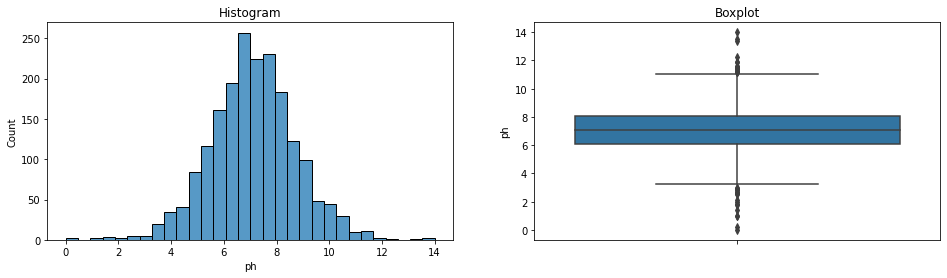

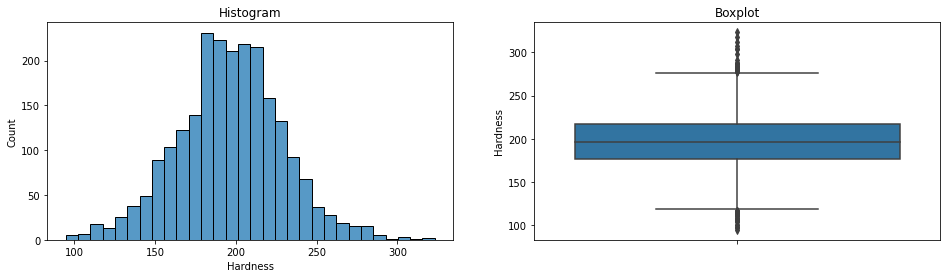

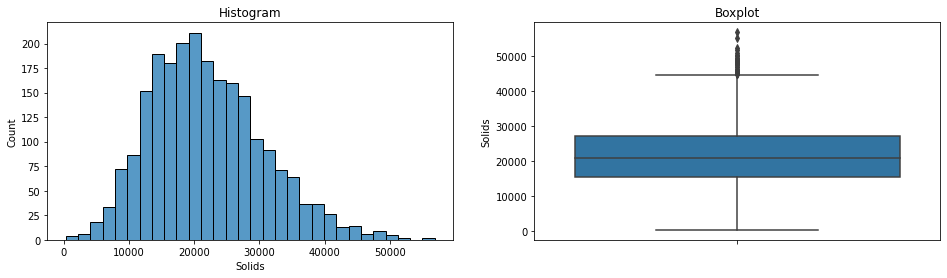

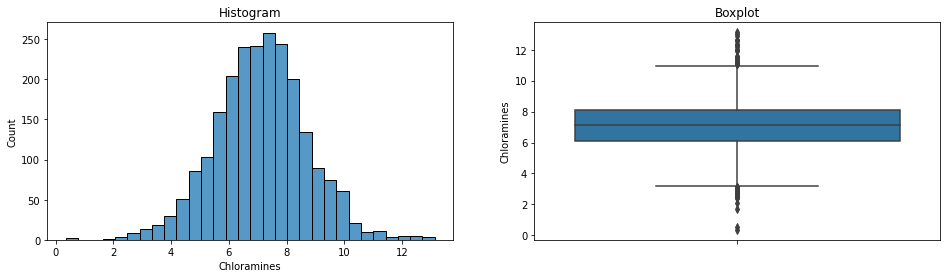

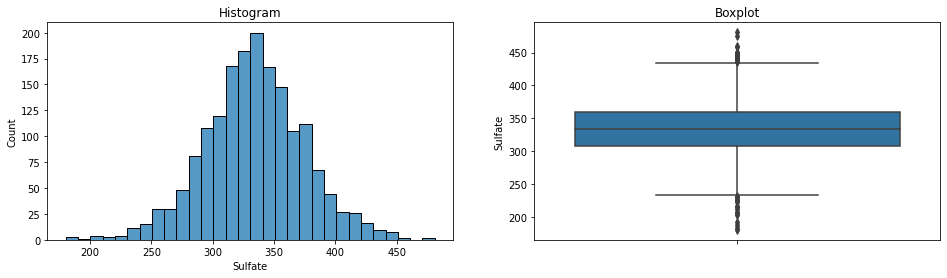

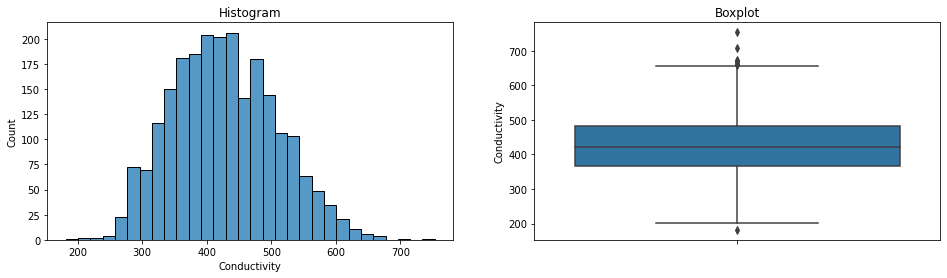

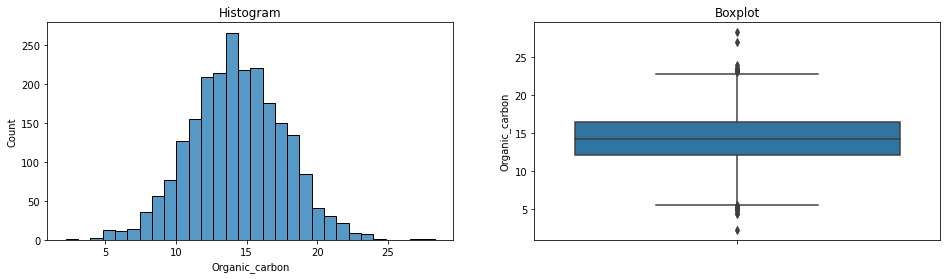

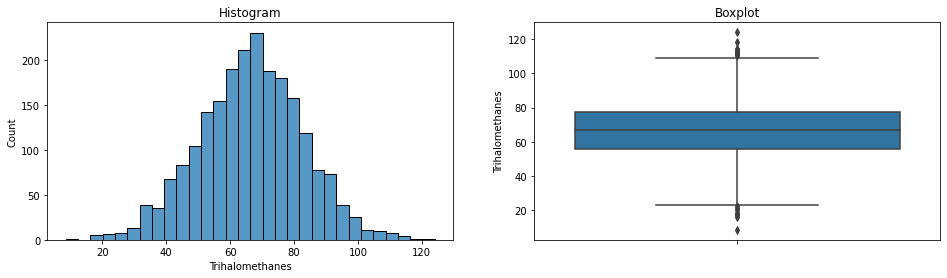

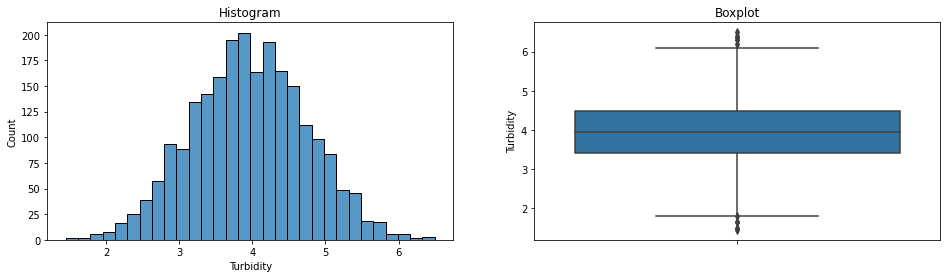

In [38]:
diagnostic_plots(numerical, 'ph')
diagnostic_plots(numerical, 'Hardness')
diagnostic_plots(numerical, 'Solids')
diagnostic_plots(numerical, 'Chloramines')
diagnostic_plots(numerical, 'Sulfate')
diagnostic_plots(numerical, 'Conductivity')
diagnostic_plots(numerical, 'Organic_carbon')
diagnostic_plots(numerical, 'Trihalomethanes')
diagnostic_plots(numerical, 'Turbidity')

In [39]:
for k in numerical:
  mean = numerical[k].mean()
  std = numerical[k].std()

  upper = mean + (3 * std)
  lower = mean - (3 * std)

  outlier = numerical[(numerical[k] > upper) | (numerical[k] < lower)]
  print(k)
  print('count of outlier: ', outlier.shape[0])
  print('percent k of outlier: ', outlier.shape[0]/numerical.shape[0] * 100, '%')
  print('='*70)

ph
count of outlier:  13
percent k of outlier:  0.5696757230499562 %
Hardness
count of outlier:  10
percent k of outlier:  0.43821209465381245 %
Solids
count of outlier:  15
percent k of outlier:  0.6573181419807186 %
Chloramines
count of outlier:  17
percent k of outlier:  0.7449605609114811 %
Sulfate
count of outlier:  12
percent k of outlier:  0.5258545135845749 %
Conductivity
count of outlier:  4
percent k of outlier:  0.175284837861525 %
Organic_carbon
count of outlier:  4
percent k of outlier:  0.175284837861525 %
Trihalomethanes
count of outlier:  6
percent k of outlier:  0.26292725679228746 %
Turbidity
count of outlier:  5
percent k of outlier:  0.21910604732690622 %


Dari perbandingan skew nya kita lihat ada 48 distribusi  normal dan 1 normal,kemudian ditemukan juga adanya outlier. Kita akan menghandling outlier dari masing-masing kolom numerical dengan menggunakan metode capping.

#### Handling Outlier

In [40]:
# capping outlier 
wins = Winsorizer(capping_method='gaussian', tail='both', fold=3, missing_values='ignore', 
variables=['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity'])
X_train_eda = wins.fit_transform(X_train_eda)
X_train_eda.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,1933.000000,2282.000000,2282.000000,2282.000000,1741.000000,2282.000000,2282.000000,2180.000000,2282.000000
mean,7.104166,196.467569,21946.725890,7.110382,334.003674,427.056189,14.315648,66.570104,3.962013
std,1.593494,32.498400,8647.533174,1.584440,40.746258,80.997011,3.295476,16.157200,0.783966
min,2.245843,98.563069,320.942611,2.307375,210.807703,183.606042,4.391956,18.001395,1.608347
25%,6.090016,176.906944,15553.848086,6.121061,308.594810,366.407590,12.122530,55.713440,3.419871
50%,7.088251,196.926487,20932.436188,7.130932,333.710870,422.137178,14.252996,66.947994,3.941892
75%,8.097454,216.675600,27275.180438,8.102951,359.516169,482.654563,16.516456,77.517441,4.494345
max,11.958795,294.458966,48060.027331,11.915652,457.114319,670.613304,24.243379,115.138685,6.315700


#### Handling Missing Value

Handling Missing Value menggunakan simpleimputer dengan menggunakan imputasi nilai Mean karena data distribusi nya normal.  

In [41]:
X_train_eda[numss].isnull().sum()

ph                 349
Hardness             0
Solids               0
Chloramines          0
Sulfate            541
Conductivity         0
Organic_carbon       0
Trihalomethanes    102
Turbidity            0
dtype: int64

In [42]:
imp_num = SimpleImputer(strategy='mean')

X_train_eda[numss] = imp_num.fit_transform(X_train_eda[numss])
X_train_eda[numss].isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

Melihat central tendency setelah dilakukan handling missing value dan capping outlier.

In [43]:
X_train_eda.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,2282.000000,2282.000000,2282.000000,2282.000000,2282.000000,2282.000000,2282.000000,2282.000000,2282.000000
mean,7.104166,196.467569,21946.725890,7.110382,334.003674,427.056189,14.315648,66.570104,3.962013
std,1.466532,32.498400,8647.533174,1.584440,35.587683,80.997011,3.295476,15.791816,0.783966
min,2.245843,98.563069,320.942611,2.307375,210.807703,183.606042,4.391956,18.001395,1.608347
25%,6.318040,176.906944,15553.848086,6.121061,317.531166,366.407590,12.122530,56.350810,3.419871
50%,7.104166,196.926487,20932.436188,7.130932,334.003674,422.137178,14.252996,66.570104,3.941892
75%,7.889454,216.675600,27275.180438,8.102951,350.523548,482.654563,16.516456,77.010134,4.494345
max,11.958795,294.458966,48060.027331,11.915652,457.114319,670.613304,24.243379,115.138685,6.315700


#### VIF 

Mencari nilai VIF untuk melihat multicolinarity antar kolom

In [44]:
vif_data = pd.DataFrame()
vif_data['feature'] = X_train_eda.columns
  
# calculating VIF for each feature
vif_data['VIF'] = [variance_inflation_factor(X_train_eda.values, i) for i in range(len(X_train_eda.columns))]

vif_data

,feature,VIF
0,ph,23.222316
1,Hardness,31.518313
2,Solids,7.153641
3,Chloramines,19.532292
4,Sulfate,56.694195
5,Conductivity,26.138234
6,Organic_carbon,19.037719
7,Trihalomethanes,17.471970
8,Turbidity,23.778408


Nilai VIF diatas treshold 5 ada di semua kolom artinya multicolenarity nya tinggi . 

#### Scaling 

Melakukan Scaling dengan menggunakan Standardscaling karena distribusinya normal 

In [45]:
scaler = StandardScaler()

X_train_eda[numss] = scaler.fit_transform(X_train_eda[numss])
X_train_eda

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
1651,7.511075e-01,-1.559503,-0.458667,-0.334527,7.135743e-01,-0.082268,0.467759,2.162493,-0.283354
1215,7.141427e-01,0.288685,-0.726931,-0.063724,4.550618e-02,1.587247,0.165562,0.392218,-1.482697
1094,-6.057647e-16,0.510094,-1.146252,1.694565,4.263004e-01,-1.766356,-0.575382,0.513307,-0.080502
549,1.150371e+00,-0.277852,-1.630427,-0.473734,1.597628e-15,-0.520324,0.730473,0.717780,-0.614627
1150,-6.057647e-16,0.258313,0.305750,0.419154,1.597628e-15,0.171410,-0.530718,3.076228,0.454531
...,...,...,...,...,...,...,...,...,...
1502,-7.525813e-01,-1.091532,-0.096588,-1.749427,-9.189603e-01,-0.522392,-1.533858,0.280720,0.273293
1055,-6.057647e-16,-0.440293,1.006298,-0.495691,-1.097181e+00,-0.283233,0.120384,2.520947,-0.135546
2371,-1.330421e+00,-2.743062,-0.327449,1.379801,-2.646819e-02,0.380781,0.949998,0.698534,-0.270597
2010,-6.057647e-16,-1.090403,0.420648,-0.197885,1.597628e-15,0.499186,-0.063766,-0.901845,0.704472


In [46]:
y_train

1651    0
1215    1
1094    1
549     0
1150    1
       ..
1502    1
1055    0
2371    1
2010    1
814     1
Name: Potability, Length: 2282, dtype: int64

### Categorical Feature

In [47]:
data_eda[catss].value_counts()

Potability
0             1392
1              890
dtype: int64

### Combine Numerical and Categorical

In [48]:
X_train_eda = pd.concat([X_train_eda[numss].reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)
X_train_eda.shape

(2282, 10)

In [49]:
X_train_eda.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.511075e-01,-1.559503,-0.458667,-0.334527,7.135743e-01,-0.082268,0.467759,2.162493,-0.283354,0
1,7.141427e-01,0.288685,-0.726931,-0.063724,4.550618e-02,1.587247,0.165562,0.392218,-1.482697,1
2,-6.057647e-16,0.510094,-1.146252,1.694565,4.263004e-01,-1.766356,-0.575382,0.513307,-0.080502,1
3,1.150371e+00,-0.277852,-1.630427,-0.473734,1.597628e-15,-0.520324,0.730473,0.717780,-0.614627,0
4,-6.057647e-16,0.258313,0.305750,0.419154,1.597628e-15,0.171410,-0.530718,3.076228,0.454531,1


### Feature Selection 

Melakukan feature selection menggunakan Heatmap Selection dan Feature Importance dari Random forest Classifier

#### Heatmap Selection

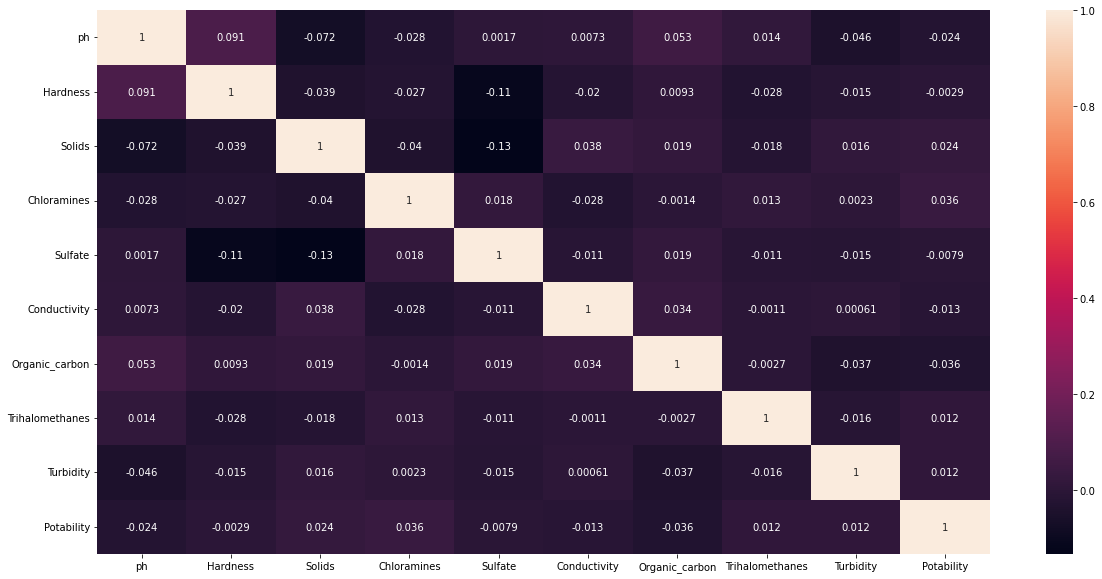

In [50]:
fig,ax = plt.subplots(figsize=[20,10])

corr = X_train_eda.corr()

ax = sns.heatmap(corr,annot=True)
plt.show()

In [51]:
X_train_eda.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

Dari hasil heatmap selection kita mendapatkan feature yang nilainya diatas 0.01 terdapat 7 feature yaitu 'ph','Solids', 'Chloramines', 'Conductivity','Organic_carbon','Trihalomethanes', 'Turbidity'.

#### Feature Importance

Kita akan menggunakan feature importance dari RandomForest Classifier 

In [52]:
# memisahkan x dan y 
X_select = X_train_eda.drop('Potability',axis=1).copy()
y_select = X_train_eda['Potability']

Feature: 0, Score: 0.13
Feature: 1, Score: 0.12
Feature: 2, Score: 0.12
Feature: 3, Score: 0.12
Feature: 4, Score: 0.12
Feature: 5, Score: 0.10
Feature: 6, Score: 0.10
Feature: 7, Score: 0.10
Feature: 8, Score: 0.10


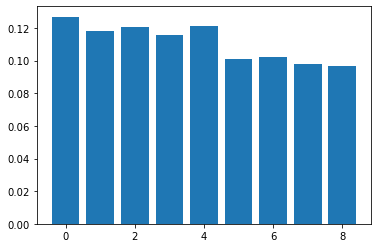

In [53]:
X, y = X_select, y_select
model = RandomForestClassifier()
model.fit(X, y)
importance = model.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.2f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Dari hasil feature importance kita mendapatkan semua kolom bernilai diatas 0.1 oleh karena itu kita akan menggunakan semua kolom sebagai feature yaitu: 'ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
'Organic_carbon', 'Trihalomethanes', 'Turbidity'

In [54]:
X_train_eda[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.511075e-01,-1.559503,-0.458667,-0.334527,7.135743e-01,-0.082268,0.467759,2.162493,-0.283354
1,7.141427e-01,0.288685,-0.726931,-0.063724,4.550618e-02,1.587247,0.165562,0.392218,-1.482697
2,-6.057647e-16,0.510094,-1.146252,1.694565,4.263004e-01,-1.766356,-0.575382,0.513307,-0.080502
3,1.150371e+00,-0.277852,-1.630427,-0.473734,1.597628e-15,-0.520324,0.730473,0.717780,-0.614627
4,-6.057647e-16,0.258313,0.305750,0.419154,1.597628e-15,0.171410,-0.530718,3.076228,0.454531
...,...,...,...,...,...,...,...,...,...
2277,-7.525813e-01,-1.091532,-0.096588,-1.749427,-9.189603e-01,-0.522392,-1.533858,0.280720,0.273293
2278,-6.057647e-16,-0.440293,1.006298,-0.495691,-1.097181e+00,-0.283233,0.120384,2.520947,-0.135546
2279,-1.330421e+00,-2.743062,-0.327449,1.379801,-2.646819e-02,0.380781,0.949998,0.698534,-0.270597
2280,-6.057647e-16,-1.090403,0.420648,-0.197885,1.597628e-15,0.499186,-0.063766,-0.901845,0.704472


Pada section ini dilakukan 
1. Numeric 
- Handling Outlier menggunakan capping metode gaussian 
- Handling missing value dengan menggunakan simpleimputer metode = mean 
- Melihat multicolenarity antar kolom dengan VIF 
- Scaling menggunakan StandardScaler 
2. Categorical 
- tidak dilakukan handling karena data sudah ordinal 

====
- Combine data numeric dan categoric
- Feature Selection using Heatmap dan feture importance by RandomForest 

## Data Preprocessing

### Pipeline

In [55]:
X_train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
1651,8.205447,145.797317,17981.254776,6.580460,359.392567,420.394223,15.856797,100.712306,3.739922
1215,8.151249,205.847301,15661.940335,7.009437,335.622779,555.590284,14.861133,72.762585,2.799883
1094,NaN,213.041191,12036.643044,9.794730,349.171395,284.017995,12.419906,74.674383,3.898916
549,8.790851,187.439812,7850.641892,6.359942,NaN,384.920771,16.722376,77.902673,3.480272
1150,NaN,204.860505,24590.125934,7.774361,NaN,440.936824,12.567061,118.357275,4.318272
...,...,...,...,...,...,...,...,...,...
1502,6.000723,161.002305,21111.664104,4.339126,301.307173,384.753298,9.261965,71.002217,4.176219
1055,NaN,182.161880,30646.815275,6.325162,294.966088,404.120152,14.712285,106.371720,3.855773
2371,5.153489,107.341982,19115.721861,9.296114,333.061939,457.891532,17.445656,77.598804,3.749921
2010,NaN,161.038971,25583.492009,6.796914,NaN,467.479901,14.105554,52.331462,4.514175


kita akan menggunakan pipeline untuk data numeric saja, karena categoric tidak melakukan handling apa apa, pipeline yang dilakukan :
- handling outlier menggunakan winsorizer metode gaussian
- handling missing value menggunakan simpleimputer metode = mean
- scaling menggunakan StandardScaller

In [56]:
pipe = Pipeline([
        ('outlier', Winsorizer(capping_method='gaussian', tail='both', fold=3,missing_values='ignore')),
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])
pipe

Pipeline(steps=[('outlier', Winsorizer(missing_values='ignore', tail='both')),
                ('imputer', SimpleImputer()), ('scaler', StandardScaler())])

In [57]:
num_tr = pipe.fit_transform(X_train)
num_tr

array([[ 7.51107450e-01, -1.55950318e+00, -4.58667250e-01, ...,
         4.67758551e-01,  2.16249256e+00, -2.83354029e-01],
       [ 7.14142702e-01,  2.88684588e-01, -7.26931359e-01, ...,
         1.65561611e-01,  3.92218202e-01, -1.48269682e+00],
       [-6.05764736e-16,  5.10094490e-01, -1.14625231e+00, ...,
        -5.75382183e-01,  5.13307336e-01, -8.05021609e-02],
       ...,
       [-1.33042115e+00, -2.74306189e+00, -3.27448819e-01, ...,
         9.49997639e-01,  6.98533769e-01, -2.70596994e-01],
       [-6.05764736e-16, -1.09040334e+00,  4.20647501e-01, ...,
        -6.37661957e-02, -9.01844539e-01,  7.04472358e-01],
       [ 1.84564091e-01,  6.53439183e-01, -1.11742293e+00, ...,
         6.00368924e-01,  1.72369284e+00, -4.71741330e-01]])

In [58]:
train_manual = np.array(X_train_eda[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']])

np.allclose(num_tr, train_manual)

True

In [59]:
test_tr = pipe.transform(X_test)
test_tr

array([[-6.05764736e-16, -7.49618258e-01,  5.37687042e-01, ...,
        -1.95398818e+00,  1.69319163e+00, -5.25267583e-01],
       [ 5.74094640e-01,  5.10870551e-01, -5.98780009e-01, ...,
        -3.81793407e-02,  9.80741775e-01, -4.80459787e-01],
       [-1.73457337e+00, -9.44698147e-01,  1.14788343e-01, ...,
        -2.28089249e-01,  8.07334283e-01,  2.06187604e-01],
       ...,
       [-5.86296204e-03,  8.22860281e-03,  9.58685141e-01, ...,
         5.30264547e-01, -2.21777969e+00,  1.14732014e+00],
       [-2.24070558e-01, -1.29557927e+00, -7.42725031e-01, ...,
         8.50714701e-01, -6.61631948e-01, -1.20499524e+00],
       [ 1.34631301e-01, -5.78760692e-01,  1.72866504e-01, ...,
        -9.47725568e-02, -7.21212362e-01, -1.51449389e+00]])

## Model Building

Model yang digunakan dalam classification ini 

- LogisticRegression
- DecisionTree Classifier
- RandomFOrest Classifier
- AdaboostClassifier

In [60]:
logreg = LogisticRegression(random_state=0)
dtc = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)
adb = AdaBoostClassifier(random_state=0)

Model training dengan menggunakan parameter default (baseline model) dari setiap algoritma. 

## Model Evaluation

### Logistic regression

              precision    recall  f1-score   support

           0       0.61      1.00      0.76      1392
           1       0.25      0.00      0.00       890

    accuracy                           0.61      2282
   macro avg       0.43      0.50      0.38      2282
weighted avg       0.47      0.61      0.46      2282

              precision    recall  f1-score   support

           0       0.61      1.00      0.76       597
           1       0.00      0.00      0.00       382

    accuracy                           0.61       979
   macro avg       0.30      0.50      0.38       979
weighted avg       0.37      0.61      0.46       979

Confusion Matrix      : 


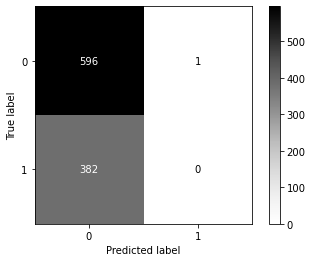

In [61]:
logreg.fit(num_tr, y_train)

lr_train = logreg.predict(num_tr)
lr_test = logreg.predict(test_tr)

print(classification_report(y_train, lr_train))
print(classification_report(y_test, lr_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(logreg, test_tr, y_test, cmap='Greys'))

### Decission Tree Classifier

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1392
           1       1.00      1.00      1.00       890

    accuracy                           1.00      2282
   macro avg       1.00      1.00      1.00      2282
weighted avg       1.00      1.00      1.00      2282

              precision    recall  f1-score   support

           0       0.66      0.67      0.66       597
           1       0.47      0.45      0.46       382

    accuracy                           0.58       979
   macro avg       0.56      0.56      0.56       979
weighted avg       0.58      0.58      0.58       979

Confusion Matrix      : 


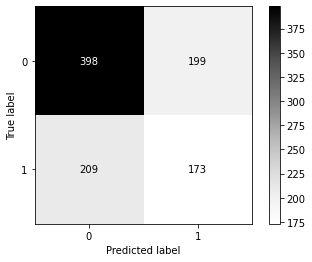

In [62]:
dtc.fit(num_tr, y_train)

dtc_train = dtc.predict(num_tr)
dtc_test = dtc.predict(test_tr)

print(classification_report(y_train, dtc_train))
print(classification_report(y_test, dtc_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(dtc, test_tr, y_test, cmap='Greys'))

### Random Forest Classifier

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1392
           1       1.00      1.00      1.00       890

    accuracy                           1.00      2282
   macro avg       1.00      1.00      1.00      2282
weighted avg       1.00      1.00      1.00      2282

              precision    recall  f1-score   support

           0       0.67      0.90      0.77       597
           1       0.68      0.32      0.43       382

    accuracy                           0.67       979
   macro avg       0.67      0.61      0.60       979
weighted avg       0.67      0.67      0.64       979

Confusion Matrix      : 


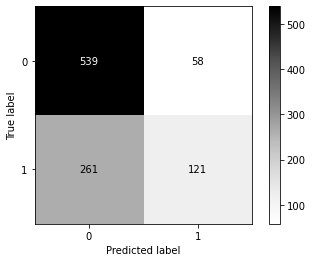

In [63]:
rfc.fit(num_tr, y_train)

rfc_train = rfc.predict(num_tr)
rfc_test = rfc.predict(test_tr)

print(classification_report(y_train, rfc_train))
print(classification_report(y_test, rfc_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rfc, test_tr, y_test, cmap='Greys'))

### AdaBoost Classifier

              precision    recall  f1-score   support

           0       0.67      0.91      0.77      1392
           1       0.68      0.29      0.40       890

    accuracy                           0.67      2282
   macro avg       0.67      0.60      0.59      2282
weighted avg       0.67      0.67      0.63      2282

              precision    recall  f1-score   support

           0       0.64      0.88      0.74       597
           1       0.53      0.22      0.31       382

    accuracy                           0.62       979
   macro avg       0.58      0.55      0.52       979
weighted avg       0.60      0.62      0.57       979

Confusion Matrix      : 


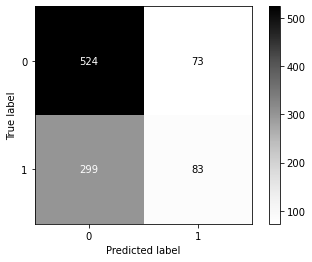

In [64]:
adb.fit(num_tr, y_train)

adb_train = adb.predict(num_tr)
adb_test = adb.predict(test_tr)

print(classification_report(y_train, adb_train))
print(classification_report(y_test, adb_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(adb, test_tr, y_test, cmap='Greys'))

Karena urgency target yaitu Potability 1=bisa diminum, 0= tidak bisa diminum
maka yang menjadi perhatian adalah nilai 0. Dimana nilai prediksi 0 nya harus tinggi. 

Kita akan menggunakan nilai precision, yaitu nilai pengukuran model bilamana kita menitikberatkan pada nilai false positive yang harus rendah dan data imbalance. 
nilai False positive yg artinya prediksinya 1 padahal actualnya 0 atau prediksi bisa diminum padahal tidak, hal ini harus dihindari atau harus bernilai lebih rendah. Jadi dari nilai precision kita lihat prediksi 0 nya harus tinggi.

Begitu juga dengan nilai dari confusion matrix nya, predict 1, actual 0 nya atau nilai false positive harus lebih rendah. 

Nilai precision dan confusion matrix yang didapatkan dari beberapa model sbb :


1. Logistic regression
- 0 : 0.61
- 1 : 0.00
- confusion_matrix = False Positive nya : 1
2. Decision Tree 
- 0 : 0.66
- 1 : 0.47
- confusion_matrix = False Positive nya : 199
3. Random Forest  
- 0 : 0.67
- 1 : 0.68
- confusion_matrix = False Positive nya : 58
4. Adaboost 
- 0 : 0.64
- 1 : 0.53
- confusion_matrix = False Positive nya : 73

Dari perhitungan sementara model yang paling bagus memprediksi nilai 0 adalah RandomForest dimana nilainya 0.67 dan confusion matrix nya juga 58, lebih rendah dibanding model lain. Sejauh ini dapat kita katakan model kita masih tidak bagus performanya dilihat juga pada saat train nilainya lebih bagus daripada test maka dapat dikatakan model ini overfit. Mari kita lihat melalui cross validation. 

## Cross Validation 

untuk mengevaluasi kinerja model maka akan kita gunakan cross validation dengan menggunakna skoring accuracy untuk melihat sejauh mana model konsisten dilihat dari nilai mean nya yang paling tinggi dan nilai standar deviasi nya yg paling rendah dari masing-masing model yg diterapkan untuk selanjutnya dipilih best model

### Logistic Regression

In [65]:
cv_logreg = cross_val_score(logreg,num_tr, y_train, cv=3, scoring='accuracy')

print('LogisticRegression')
print('accuracy Score - All - Cross Validation  : ', cv_logreg)
print('accuracy Score - Mean - Cross Validation : ', cv_logreg.mean())
print('accuracy Score - Std - Cross Validation  : ', cv_logreg.std())
print('accuracy Score - Range of Test-Set       : ', (cv_logreg.mean()-cv_logreg.std()) , '-', (cv_logreg.mean()+cv_logreg.std()))

LogisticRegression
accuracy Score - All - Cross Validation  :  [0.60840999 0.60578187 0.61052632]
accuracy Score - Mean - Cross Validation :  0.6082393895382346
accuracy Score - Std - Cross Validation  :  0.00194066631456797
accuracy Score - Range of Test-Set       :  0.6062987232236666 - 0.6101800558528027


### Decission Tree Classifier

In [66]:
cv_dtc = cross_val_score(dtc,num_tr, y_train, cv=3, scoring='accuracy')

print('LogisticRegression')
print('accuracy Score - All - Cross Validation  : ', cv_dtc)
print('accuracy Score - Mean - Cross Validation : ', cv_dtc.mean())
print('accuracy Score - Std - Cross Validation  : ', cv_dtc.std())
print('accuracy Score - Range of Test-Set       : ', (cv_dtc.mean()-cv_dtc.std()) , '-', (cv_dtc.mean()+cv_dtc.std()))

LogisticRegression
accuracy Score - All - Cross Validation  :  [0.56373193 0.59395532 0.56184211]
accuracy Score - Mean - Cross Validation :  0.5731764529589414
accuracy Score - Std - Cross Validation  :  0.014713121314206172
accuracy Score - Range of Test-Set       :  0.5584633316447352 - 0.5878895742731476


### Random Forest Classifier

In [67]:
cv_rfc = cross_val_score(rfc,num_tr, y_train, cv=3, scoring='accuracy')

print('LogisticRegression')
print('accuracy Score - All - Cross Validation  : ', cv_rfc)
print('accuracy Score - Mean - Cross Validation : ', cv_rfc.mean())
print('accuracy Score - Std - Cross Validation  : ', cv_rfc.std())
print('accuracy Score - Range of Test-Set       : ', (cv_rfc.mean()-cv_rfc.std()) , '-', (cv_rfc.mean()+cv_rfc.std()))

LogisticRegression
accuracy Score - All - Cross Validation  :  [0.65308804 0.64914586 0.66578947]
accuracy Score - Mean - Cross Validation :  0.6560077921479125
accuracy Score - Std - Cross Validation  :  0.007101463167929983
accuracy Score - Range of Test-Set       :  0.6489063289799825 - 0.6631092553158425


### Adaboost Classifier

In [68]:
cv_adb = cross_val_score(adb,num_tr, y_train, cv=3, scoring='accuracy')

print('LogisticRegression')
print('accuracy Score - All - Cross Validation  : ', cv_adb)
print('accuracy Score - Mean - Cross Validation : ', cv_adb.mean())
print('accuracy Score - Std - Cross Validation  : ', cv_adb.std())
print('accuracy Score - Range of Test-Set       : ', (cv_adb.mean()-cv_adb.std()) , '-', (cv_adb.mean()+cv_adb.std()))

LogisticRegression
accuracy Score - All - Cross Validation  :  [0.60578187 0.58607096 0.60921053]
accuracy Score - Mean - Cross Validation :  0.6003544505152499
accuracy Score - Std - Cross Validation  :  0.010196486966582735
accuracy Score - Range of Test-Set       :  0.5901579635486672 - 0.6105509374818326


### Best Score

In [69]:
crossval = [cv_logreg,cv_dtc,cv_rfc,cv_adb]
mean = []
std = []
for i in crossval:
    mean.append(i.mean())
    std.append(i.std())
model = ['Logistic Regression','Decission Tree','Random Forest','AdaBoost']
bestmodel = pd.DataFrame(model)
bestmodel['Mean']=np.round(mean,3)
bestmodel['Std']=np.round(std,3)
bestmodel.rename(columns={0:'Model'},inplace = True)
bestmodel.sort_values(by= 'Mean' , ascending = False).reset_index(drop=True)

,Model,Mean,Std
0,Random Forest,0.656,0.007
1,Logistic Regression,0.608,0.002
2,AdaBoost,0.600,0.010
3,Decission Tree,0.573,0.015


Dari hasil cross validation didapatkan hasil bahwa Model RandomForest mendapatkan peringkat pertama dimana nilai Mean nya 0.656 dan std nya 0.007. Maka dari itu akan kita coba untuk menerapkan hyperparameter pada model ini untuk mendapatkan hasil yang lebih bagus.

## Hyperparameter Tuning using GridSearchCV

### Random Forest Classifier

Mendefinisikan parameter parameter yang akan digunakan dalam pemilihan gridsearch

Menerapkan fungsi random_grid ke dalam gridseacrhcv dengan menggunakna scoring precision.

In [70]:
params = [
    {'n_estimators': [10, 20, 40, 60],        
     'max_features': [2, 3, 5, 1],            
     'max_depth': [5, 10, None],           
     'criterion': ['gini', 'entropy'],
     'class_weight' : ['balanced_subsample']}      
  ]

rfc = RandomForestClassifier(random_state=0)

grid_search = GridSearchCV(rfc, params, cv=5,
                           scoring='precision',
                           return_train_score=True)
grid_search.fit(num_tr, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid=[{'class_weight': ['balanced_subsample'],
                          'criterion': ['gini', 'entropy'],
                          'max_depth': [5, 10, None],
                          'max_features': [2, 3, 5, 1],
                          'n_estimators': [10, 20, 40, 60]}],
             return_train_score=True, scoring='precision')

In [71]:
grid_search.best_params_

{'class_weight': 'balanced_subsample',
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 1,
 'n_estimators': 60}

In [72]:
grid_search.best_score_

0.6455741151691856

Implementasi pada data train dan test menggunakan best parameter

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1392
           1       1.00      1.00      1.00       890

    accuracy                           1.00      2282
   macro avg       1.00      1.00      1.00      2282
weighted avg       1.00      1.00      1.00      2282

              precision    recall  f1-score   support

           0       0.66      0.92      0.77       597
           1       0.66      0.26      0.37       382

    accuracy                           0.66       979
   macro avg       0.66      0.59      0.57       979
weighted avg       0.66      0.66      0.61       979

Confusion Matrix      : 


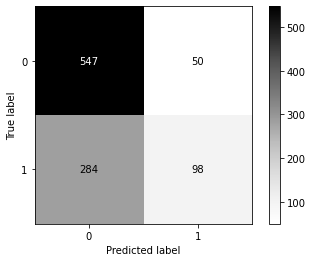

In [73]:
model = grid_search.best_estimator_

model.fit(num_tr, y_train)

model_train = model.predict(num_tr)
model_test = model.predict(test_tr)

print(classification_report(y_train, model_train))
print(classification_report(y_test, model_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model, test_tr, y_test, cmap='Greys'))

Setelah dilakukan hyperparameter tuning pada RandomForest dan diterapkan pada data test nya hasilnya sama dengan pada saat training model dengan baseline, Nilai recall dan confusion nya sbb:

1. Baseline RandomForest 
- 0 : 0.67
- 1 : 0.68
- confusion_matrix = False Positive nya : 58

2. Setelah Hyperparameter Tuning
- 0 : 0.66
- 1 : 0.66
- confusion_matrix = False Positive nya : 50

hasil precision nya menurun namun false positive nya naik dari 58 menjadi 50. 

Menerapkan best model menggunakan pipeline. 

In [74]:
pipe

Pipeline(steps=[('outlier', Winsorizer(missing_values='ignore', tail='both')),
                ('imputer', SimpleImputer()), ('scaler', StandardScaler())])

In [75]:
all_process = Pipeline([
    ("preprocess", pipe),
    ("classification", model)
])

all_process.fit(X_train, y_train)
hasil = all_process.predict(X_test)

print(classification_report(y_test, hasil))

              precision    recall  f1-score   support

           0       0.66      0.92      0.77       597
           1       0.66      0.26      0.37       382

    accuracy                           0.66       979
   macro avg       0.66      0.59      0.57       979
weighted avg       0.66      0.66      0.61       979



In [76]:
all_process

Pipeline(steps=[('preprocess',
                 Pipeline(steps=[('outlier',
                                  Winsorizer(missing_values='ignore',
                                             tail='both')),
                                 ('imputer', SimpleImputer()),
                                 ('scaler', StandardScaler())])),
                ('classification',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        criterion='entropy', max_features=1,
                                        n_estimators=60, random_state=0))])

## Model Improvement 

Karena model kita tidak terlalu bekerja dengan baik maka kita akan mencoba melakukan model improvement dengan handling imbalance data menggunakan SMOTE. 

In [77]:
# imbalance pipeline
pipes = imbpipe([
        ('outlier', Winsorizer(capping_method='gaussian', tail='both', fold=3,missing_values='ignore')),
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('over_sampl', SMOTE(sampling_strategy=0.8, random_state=0))
        ])
pipes


Pipeline(steps=[('outlier', Winsorizer(missing_values='ignore', tail='both')),
                ('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('over_sampl', SMOTE(random_state=0, sampling_strategy=0.8))])

In [78]:
X_resampled, y_resampled = pipes.fit_resample(X_train, y_train)
resampled = pd.concat([pd.DataFrame(X_resampled, columns=X_train.columns.tolist()), pd.DataFrame(y_resampled)], axis=1)
resampled

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.511075e-01,-1.559503,-0.458667,-0.334527,7.135743e-01,-0.082268,0.467759,2.162493,-0.283354,0
1,7.141427e-01,0.288685,-0.726931,-0.063724,4.550618e-02,1.587247,0.165562,0.392218,-1.482697,1
2,-6.057647e-16,0.510094,-1.146252,1.694565,4.263004e-01,-1.766356,-0.575382,0.513307,-0.080502,1
3,1.150371e+00,-0.277852,-1.630427,-0.473734,1.597628e-15,-0.520324,0.730473,0.717780,-0.614627,0
4,-6.057647e-16,0.258313,0.305750,0.419154,1.597628e-15,0.171410,-0.530718,3.076228,0.454531,1
...,...,...,...,...,...,...,...,...,...,...
2500,2.115931e-01,1.171494,1.105716,0.164525,-1.424378e+00,-0.030513,2.281395,1.246395,0.727987,1
2501,-6.057647e-16,0.357039,-0.324440,-0.139161,1.003052e+00,-1.031721,-0.928791,-1.336389,-0.172454,1
2502,-1.080550e+00,0.401707,0.627982,-1.965513,1.527412e-01,-0.620906,1.035630,-1.459466,-0.133519,1
2503,9.247414e-01,0.881089,-1.152185,0.036543,3.116029e-01,0.669305,1.014850,0.295439,0.583055,1


Melihat data yang sudah di handling imbalance. 

In [79]:
resampled.Potability.value_counts()

0    1392
1    1113
Name: Potability, dtype: int64

In [80]:
full_imbhandling = imbpipe([
            ('outlier', Winsorizer(capping_method='gaussian', tail='both', fold=3,missing_values='ignore')),
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('over_sampl', SMOTE(sampling_strategy=0.8, random_state=0)),
            ('rfc', RandomForestClassifier(class_weight= 'balanced_subsample',criterion='gini',max_features= 5,n_estimators= 60))
])

full_imbhandling

Pipeline(steps=[('outlier', Winsorizer(missing_values='ignore', tail='both')),
                ('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('over_sampl', SMOTE(random_state=0, sampling_strategy=0.8)),
                ('rfc',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        max_features=5, n_estimators=60))])

Implementasi pipeline pada data test menggunakan model dengan best parameter yang sudah kita dapatkan sebelumnya. 

In [81]:
full_imbhandling.fit(X_train, y_train)

# evaluate on test
handled_pred = full_imbhandling.predict(X_test)

print(classification_report(y_test, handled_pred))


              precision    recall  f1-score   support

           0       0.69      0.82      0.75       597
           1       0.59      0.42      0.49       382

    accuracy                           0.66       979
   macro avg       0.64      0.62      0.62       979
weighted avg       0.65      0.66      0.65       979



c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


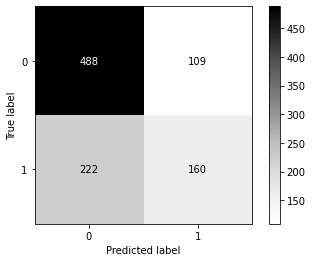

In [82]:
plot_confusion_matrix(full_imbhandling, X_test, y_test,cmap='Greys')

Dapat terlihat bahwa implementasi  handling data imbalance kurang berpengaruh terhadap performa model, hasilnya precision nya tidak lebih bagus dibanding tanpa handling imbalance, dan false positivenya juga lebih besar. Selanjutnya untuk model inference akan digunakan data yang semula.

1. Setelah imbalance handling
- 0 : 0.69
- 1 : 0.59
- confusion_matrix = False Positive nya : 109

2. Sebelum imbalance handling
- 0 : 0.66
- 1 : 0.66
- confusion_matrix = False Positive nya : 50

## Model Inference

In [83]:
data_inf

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,6.665774,155.709679,30610.047900,8.172548,337.173767,425.691956,15.101533,79.780467,4.903553,1
1,6.185951,174.796123,22198.929420,7.608496,NaN,479.091845,13.744284,51.497112,5.205724,0
2,NaN,168.388431,27492.307307,7.046225,299.820478,383.795020,16.182066,75.729434,3.048057,0
3,6.887864,173.325022,19947.924178,7.488703,334.098023,441.002612,10.780501,89.005492,5.454488,0
4,NaN,162.935371,24916.625585,6.374496,388.312725,494.288784,14.297696,84.802970,4.301273,0
5,8.589202,233.727975,7263.056749,6.953308,268.971355,258.880209,8.986363,41.930439,4.041446,1
6,6.088022,162.278357,23567.132875,7.698582,372.835081,387.970635,13.663607,75.266064,4.173083,0
7,7.943882,211.816551,32071.179369,7.769215,290.337398,353.336484,17.871950,78.492783,4.111691,0
8,NaN,161.826476,29299.123353,7.028797,350.430940,375.780716,19.762576,86.698457,3.497577,1
9,6.579969,197.226981,17657.084176,4.506293,290.289894,254.393276,9.847655,73.749716,4.575932,0


In [84]:
data_inf.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

Menghilangkan target dari inference

In [85]:
X_inf = data_inf.drop('Potability',axis=1).copy()

Predict inference menggunakna pipeline

In [86]:
hasil_inf = all_process.predict(X_inf)
hasil_inf

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [87]:
hasil_inff = pd.DataFrame(hasil_inf, columns=['hasil prediksi'])
hasil_inff.head()

,hasil prediksi
0,0
1,0
2,0
3,0
4,1


membandingkan hasil prediksi dengan data asli

In [88]:
hasil_inff['Real Data'] = data_inf['Potability']
hasil_inff

,hasil prediksi,Real Data
0,0,1
1,0,0
2,0,0
3,0,0
4,1,0
5,0,1
6,0,0
7,1,0
8,0,1
9,0,0


Model tidak cukup bagus untuk konsisten memprediksi 0 dan 1. Masih banyak kesalahan prediksi. Dari 20 data, 6 salah terprediksi. False negative : 4, False positive : 2. 

## Model Inference - Deployment

In [89]:
#save model

pickle.dump(all_process, open("Model.pkl", "wb"))

In [90]:
set_config(display='diagram')

In [91]:
all_process

Pipeline(steps=[('preprocess',
                 Pipeline(steps=[('outlier',
                                  Winsorizer(missing_values='ignore',
                                             tail='both')),
                                 ('imputer', SimpleImputer()),
                                 ('scaler', StandardScaler())])),
                ('classification',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        criterion='entropy', max_features=1,
                                        n_estimators=60, random_state=0))])

In [92]:
# STEP 1 - Import saved model
models = pickle.load(open("Model.pkl", "rb"))

In [93]:
# STEP 2 - Prepare input data from user

inf = X_inf.head(1)
inf

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,6.665774,155.709679,30610.0479,8.172548,337.173767,425.691956,15.101533,79.780467,4.903553


In [94]:
# STEP 3 - model predict input data
pred = model.predict(inf).tolist()[0]
pred

c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0

In [95]:
# STEP 4 - interpretation for human language
if pred == 1:
    print('Potable')
else:
    print('Not Potable')

Not Potable


## Kesimpulan 

- Analisis Data Water Potability ini berfokus pada pengujian apakah air bisa diminum atau tidak dengan urgency model prediksi harus bisa meminimalkan kesalahan prediksi air bisa diminum padahal kenyataan nya tidak.
- Model terbaik yang didapatkan setelah melakukan uji validasi kepada semua model yaitu Random Forest Classifier. 
- Hyper-parameter tuning yang telah dilakukan memperbaiki performa model namun tidak signifikan
- Handling Imbalance pada data tidak menghasilkan atau memperbaiki performa model
- Model RandomForest tidak cukup bagus untuk konsisten memprediksi 0 dan 1. Masih banyak kesalahan prediksi. Dari 20 data inference, 6 salah terprediksi. False negative : 4, False positive : 2. 
- Namun hasil baik nya hasil false positive lebih rendah dari pada false negative. Sesuai dengan ekspektasi sebelumnya. 
- Untuk kedepannya, bisa dipilih lagi model model klasifikasi lain dengan perbaikan hyperparameter yang lebih baik pula, kemudian handling imbalance data lebih dalam lagi dan melakukan feature selection lebih teliti lagi dengan cara cara lain. 

